## Sampling
-  In almost every field of study (natural sciences, politics, computer science), we often need statistics about our data. But more often than not, it is simply too impractical to gain all possible information to arrive at our summary and conclusions. For example, if we wanted to predict election results, it would be impractical to gather preference data from every eligible voter in the country.

In such cases, we have to resort to cheaper methods that are more feasible. One such method is to gather data of a small fraction of the population that you believe represents the entire population well. The statistics gathered from this fraction of people would then be reflective of the population as a whole. This is called sampling.

In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data=pd.read_csv('D:/Datasets/cred/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

## Estimating a Population Proportion
-  In the following sections, we are going to try and find the fraction of transactions that are fraudalent by examining data from only 5% of the sample.

In [4]:
df_samp = data.sample(frac=0.05)
df_samp.shape

(14240, 31)

In [5]:
df_samp['Class'].value_counts()

0    14217
1       23
Name: Class, dtype: int64

In [8]:
p_hat = len(df_samp[df_samp['Class'] == 1]) / len(df_samp)
p_hat


0.0016151685393258426

In [10]:
p_hat_samples = []
for i in range(1000):
    sample = data.sample(frac=0.05)
    p_sample = len(sample[sample['Class'] == 1]) / len(sample)
    p_hat_samples.append(p_sample)

C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


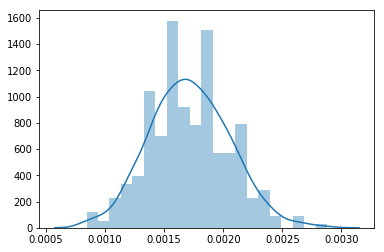

In [11]:
sns.distplot(p_hat_samples)

## As can be seen above, the $\hat{p}$'s are in the form of a normal distribution. Without proof, we will present the following results:



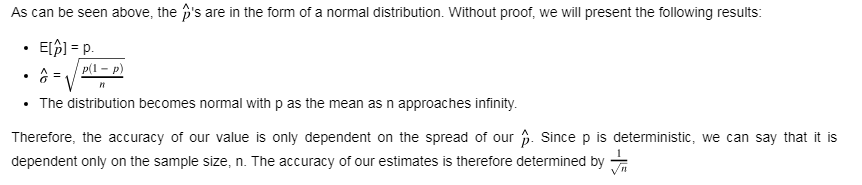

In [13]:
from IPython.display import Image
Image(filename='D:/images/pic22.png')

## Reporting our results
-  The sample size determines the accuracy of our results. As mentioned earlier, we can never be 100% accurate with our results. We can only be confident to a certain level. From our previous notebook, we learnt about z-scores and p-values. We know that 68% of the values fall within one standard deviation

In [14]:
def zscore(frac):
    return stats.norm.ppf(0.5 + frac/2)

In [15]:
z = zscore(0.99)
z

2.5758293035489004

## The above result tells us that 99% of the values fall within 2.575 standard deviations.

In [16]:

p_hat

0.0016151685393258426

In [17]:
sigma_hat = np.sqrt((p_hat * (1- p_hat))/len(df_samp))
sigma_hat

0.00033651382865505314

In [18]:
lower_limit = p_hat - z*sigma_hat
upper_limit = p_hat + z*sigma_hat
lower_limit, upper_limit

(0.0007483663584267231, 0.002481970720224962)

-  From the above result, we can directly state that we are 99% confident that the real p lies within (0.00069716474925151251, 0.0023927228911979257).

We can now present the following results:

There is a tradeoff between confidence level and range size. Higher the confidence, larger the range.
Increasing the sample size will lead to a reduced standard deviation and therefore, more accurate and practically significant results.

### Finally let us check if our results tally with what we've suggested

In [20]:
p = len(data[data['Class'] == 1])/len(data)
p

0.001727485630620034

-   The value of p does indeed fall between the above range.

Finally, let us check on the mean of the $\hat{p}$'s we obtained from simulating the experiment a 1000 times. From our results, we know that this mean will approach p as n approaches infinity. Therefore, we should be reasonably confident that this mean is extremely close to the value of p.

In [21]:
expected_p = pd.Series(p_hat_samples).mean()
expected_p

0.00171636235955055